## SALES PREDICTION USING PYTHON
Analyzing the Impact of Advertising Budgets on Sales Using Linear Regression

## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
%matplotlib inline

## READING DATASET

In [ ]:
df=pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv", encoding="latin-1")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## VISUALISING DATASET

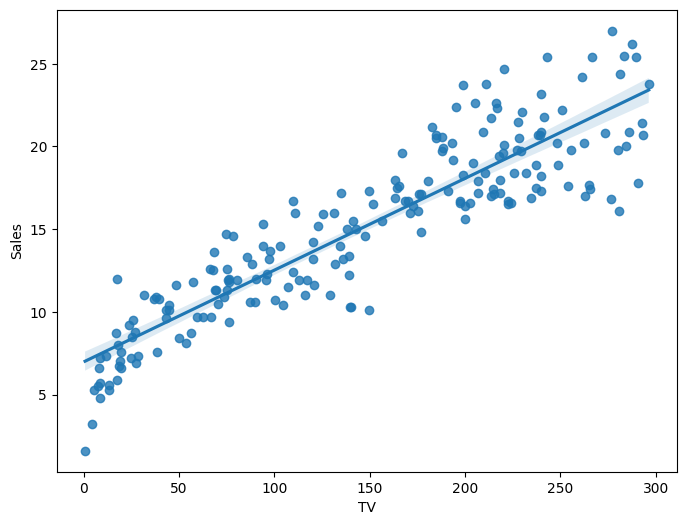

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x = "TV",
            y = "Sales",
            data = df)
plt.show()

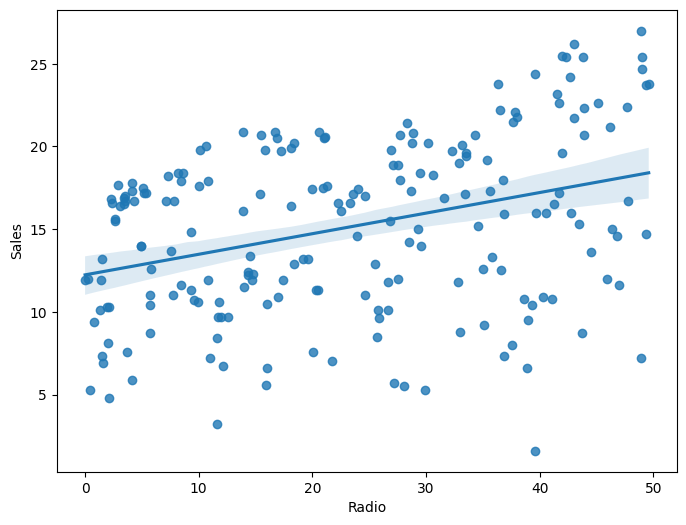

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x = "Radio",
            y = "Sales",
            data = df)
plt.show()

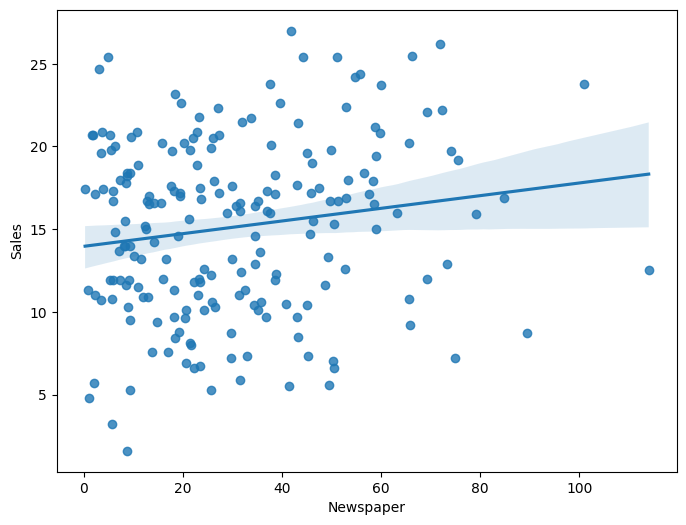

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x = "Newspaper",
            y = "Sales",
            data = df)
plt.show()

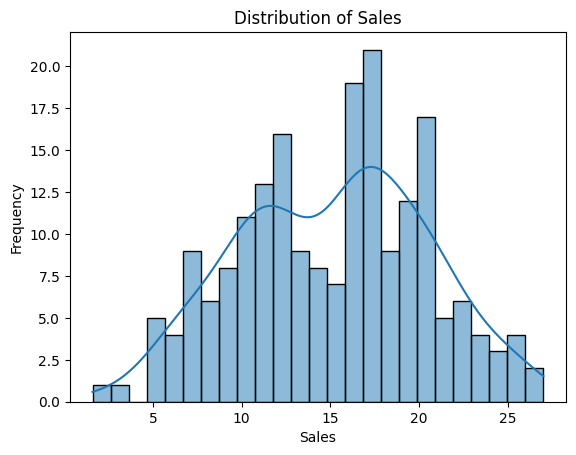

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Plotting the histogram
sns.histplot(df['Sales'], bins=25, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## ANALYSING OUTLIERS USING BOX PLOT

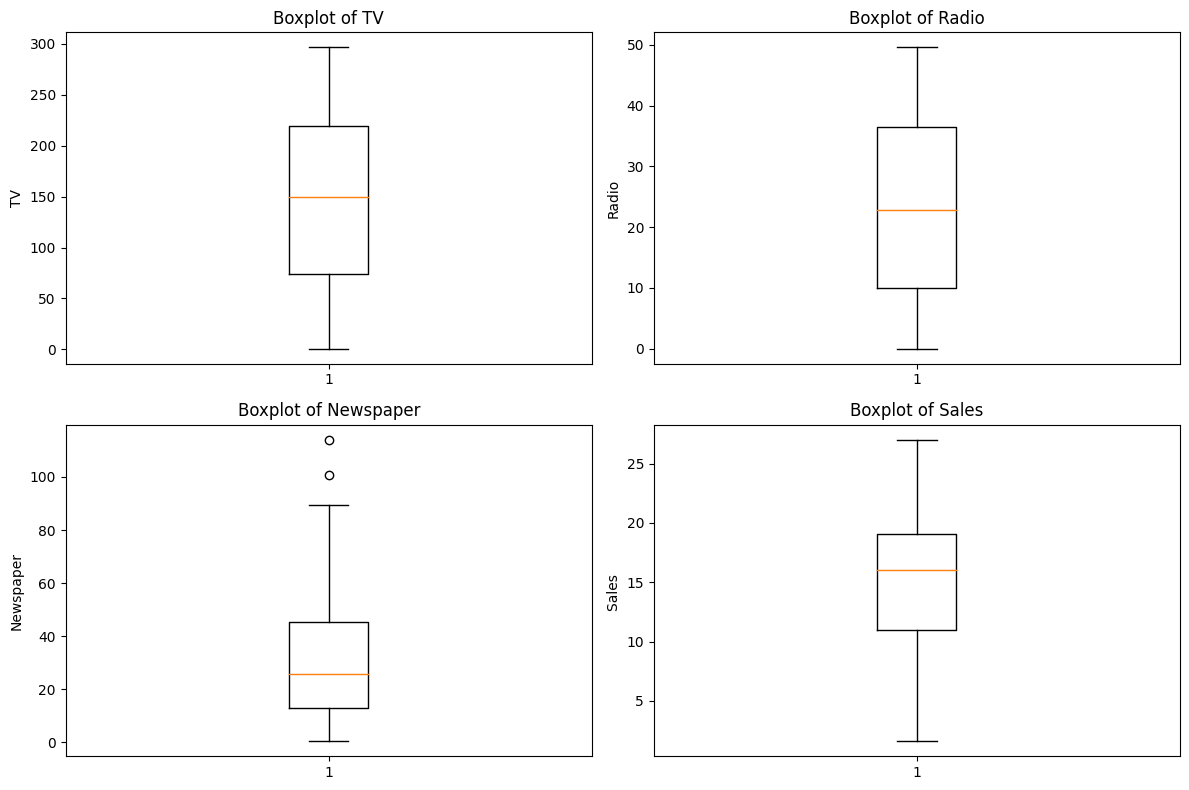

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(df['TV'])
plt.title('Boxplot of TV')
plt.ylabel('TV')

plt.subplot(2, 2, 2)
plt.boxplot(df['Radio'])
plt.title('Boxplot of Radio')
plt.ylabel('Radio')

plt.subplot(2, 2, 3)
plt.boxplot(df['Newspaper'])
plt.title('Boxplot of Newspaper')
plt.ylabel('Newspaper')

plt.subplot(2, 2, 4)
plt.boxplot(df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales ')

plt.tight_layout()
plt.show()

## ANALYSING CORELATION USING HEATMAP

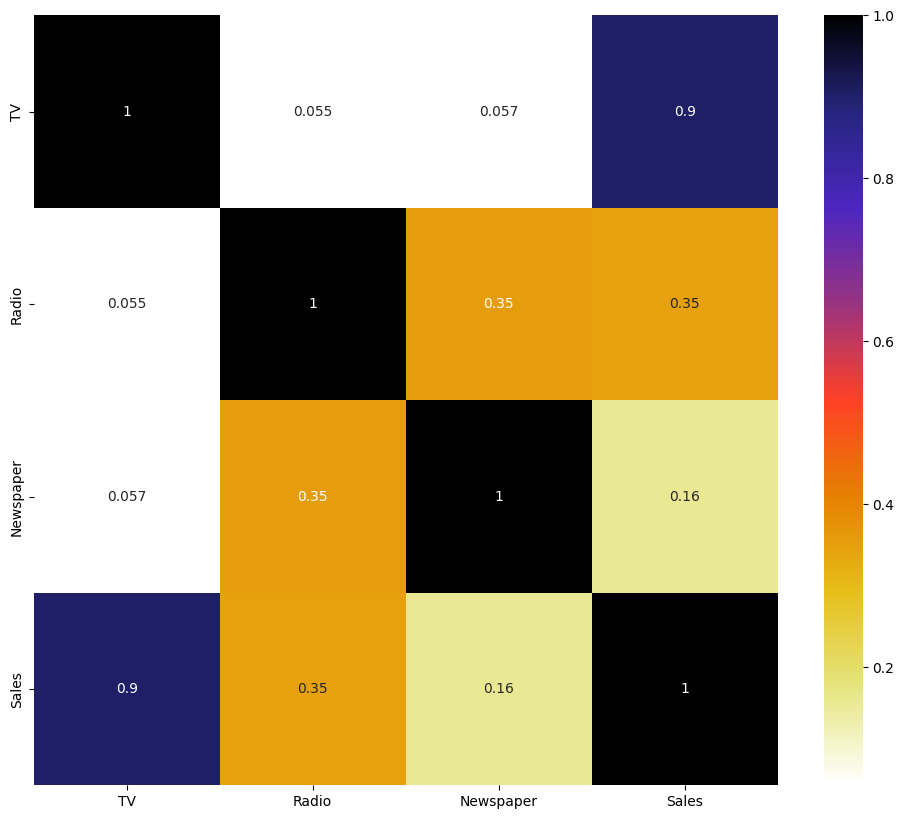

In [ ]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## FEATURE SELECTION

+ USING MUTUAL INFORMATION GAIN

Mutual Information: [0.93896259 0.28424249 0.1142574 ]


<Axes: >

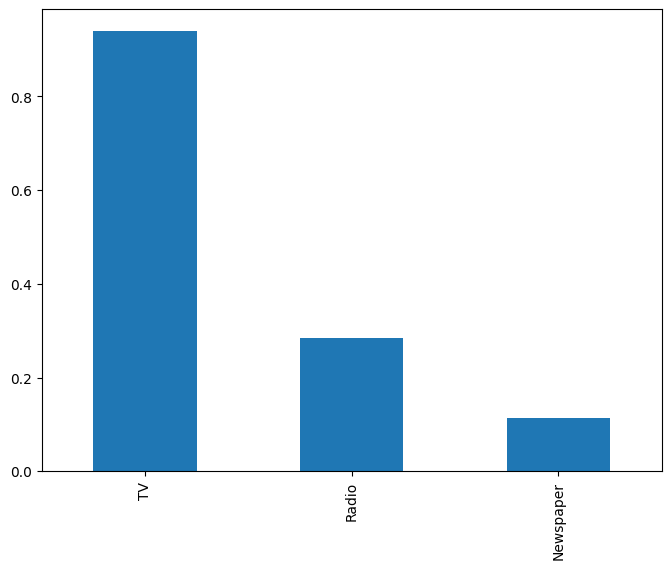

In [ ]:
X1=df.drop(columns='Sales',axis=1)
Y1=df['Sales']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3)
mutual_info=mutual_info_regression(X1_train,Y1_train)
print("Mutual Information:",mutual_info)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X1_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8,6))

## SELECTING FEATURES BASED ON ANALYSED DATA

##### As we can see the 'Newspaper' column has certain outliers and has least correlation with the target 'Sales' column, we can drop this column.

In [ ]:
x=df[['TV','Radio']]
y=df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

# PREPARING REGRESSION MODEL

### NORMALIZING DATA

In [ ]:
scaler = StandardScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)

### CREATING LINEAR REGRESSION MODEL

In [ ]:
model = LinearRegression()
model.fit(normalized_X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(normalized_X_test)

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:')
print(f'TV: {coefficients[0]:.2f}')
print(f'Radio: {coefficients[1]:.2f}')
print(f'Intercept: {intercept:.2f}')

Coefficients:
TV: 4.78
Radio: 1.55
Intercept: 15.02


### REGRESSION MODEL REPORT

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2.25
R^2 Score: 0.92


### VIZUALISING PREDICTIONS

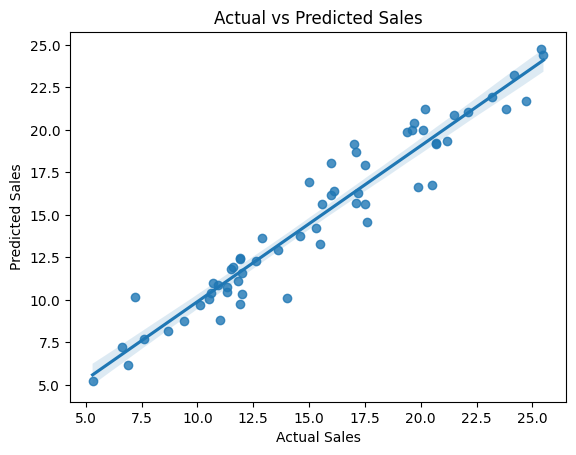

In [ ]:
sns.regplot(x = Y_test,
            y = y_pred,
            data = df)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()